# 'Niner' analysis

In [162]:
import os, pickle
import numpy as np
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import interpolate

In [163]:
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc. 
#sns.set_context('talk') # try: 'talk', 'poster', 'notebook'
sns.set_theme(style="ticks", palette="pastel")

## Get the result files

In [164]:
# Get current result files.
result_dir = Path('../nines/results').absolute()
result_file_names = os.listdir(result_dir)
result_file_names = list(filter(lambda name: str.startswith(name, 'result'), result_file_names))

single_result_files_paths = []
for name in result_file_names:
    single_result_files_paths.append(result_dir / name)

print(f"Number observer: {len(single_result_files_paths)}")

Number observer: 23


Write result files to dataframe

In [165]:
df = pd.DataFrame()
for index, path in enumerate(single_result_files_paths):
    print(index, path)
    df_tmp = pd.read_csv(path)
    df_tmp['observer'] = index
    df = pd.concat((df, df_tmp))

df.columns = ['test_image', '0', '1', '2', '3', '4', '5', '6', '7', '8', 'choosen', 'observer']

df


0 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/results_niner_okan.csv
1 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220125-182957_max_a.csv
2 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/results_niner_kat.csv
3 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220118-182237_max.csv
4 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220120-erdem.csv
5 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220121-221605_marius_03.csv
6 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220119-161616_max_cs.csv
7 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220125-erdem1.csv
8 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/results_niner_son.csv
9 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220125-erdem2.csv
10 /home/max/git/PerceptionAndImageQua

,test_image,0,1,2,3,4,5,6,7,8,choosen,observer
0,H9_recolor.BMP,0.6,1.0,1.34,1.66,1.97,2.26,2.53,2.79,3.04,2.79,0
1,I12_recolor.BMP,0.6,1.0,1.42,1.84,2.26,2.69,3.12,3.55,3.99,2.69,0
2,H16_recolor.BMP,0.6,1.0,1.45,1.92,2.40,2.90,3.41,3.93,4.47,1.45,0
3,I07_recolor.BMP,0.6,0.8,1.00,1.20,1.39,1.58,1.78,1.97,2.16,0.60,0
4,H8_recolor.BMP,0.6,1.0,1.38,1.75,2.11,2.47,2.82,3.16,3.50,1.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40,H26_recolor.BMP,0.6,1.0,1.31,1.60,1.86,2.11,2.33,2.52,2.70,1.86,22
41,H12_recolor.BMP,0.6,1.0,1.51,2.05,2.61,3.20,3.82,4.47,5.15,3.20,22
42,I21_recolor.BMP,0.6,1.0,1.28,1.54,1.77,1.96,2.13,2.27,2.38,2.38,22
43,H20_recolor.BMP,0.6,1.0,1.39,1.79,2.18,2.57,2.95,3.34,3.72,1.00,22


# Sanity checks
We expect 30 historic and 15 modern images used during tests.
Each result file  from each observer shall be 30 + 15 images long.

In [166]:
df["observer"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [167]:
# sanity checks: how many groups do you expect per categorical variable?
#assert len(df['test_image'].unique()) == 30 + 15

# Check number of observers.
#assert len(df['observer'].unique()) == len(result_file_names)

# Check length of result from each observer.
#for observer_id in df['observer'].unique():
#    assert len(df[df['observer'] == observer_id]) == 30 + 15
#    assert len(df[df['observer'] == observer_id]['test_image'].unique()) == 30 + 15


## Clean up of image names

In [168]:
df['test_image'] = [s.split('_')[0] for s in df['test_image'].tolist()]
df = df.sort_values(by='test_image', ascending=True, key=lambda col: [int(img[1:]) for img in col])

In [169]:
list_of_used_images = [f"H{index}" for index in range(30)]
list_of_used_images += [f"I{index:02d}" for index in [1, 3, 4, 6, 7, 8, 12, 13, 14, 15 ,16, 20, 21, 22, 23]]
#df[df["test_image"] == "H12"]
assert len(list_of_used_images) == 30 + 15
list_of_used_images

['H0',
 'H1',
 'H2',
 'H3',
 'H4',
 'H5',
 'H6',
 'H7',
 'H8',
 'H9',
 'H10',
 'H11',
 'H12',
 'H13',
 'H14',
 'H15',
 'H16',
 'H17',
 'H18',
 'H19',
 'H20',
 'H21',
 'H22',
 'H23',
 'H24',
 'H25',
 'H26',
 'H27',
 'H28',
 'H29',
 'I01',
 'I03',
 'I04',
 'I06',
 'I07',
 'I08',
 'I12',
 'I13',
 'I14',
 'I15',
 'I16',
 'I20',
 'I21',
 'I22',
 'I23']

In [170]:
df = df[df["test_image"].isin(list_of_used_images)]

In [171]:
len(df['test_image'].unique())

45

In [185]:
# sanity checks: how many groups do you expect per categorical variable?
assert len(df['test_image'].unique()) == 30 + 15

# Check number of observers.
assert len(df['observer'].unique()) == len(result_file_names)

# Check length of result from each observer.
for observer_id in df['observer'].unique():
    assert len(df[df['observer'] == observer_id]) == 30 + 15
    assert len(df[df['observer'] == observer_id]['test_image'].unique()) == 30 + 15


In [186]:
max_factor = np.ceil(max(df[[str(i) for i in range(9)]].max(axis=0)))
max_factor

8.0

### Devide dataframe into historic and modern images
And verify result.

In [174]:
df_historic = df[df['test_image'].str.startswith('H')]
df_modern = df[df['test_image'].str.startswith('I')]

assert len(df_historic['test_image'].unique()) == 30
assert len(df_modern['test_image'].unique()) == 15

### Historic plots

Barplot.

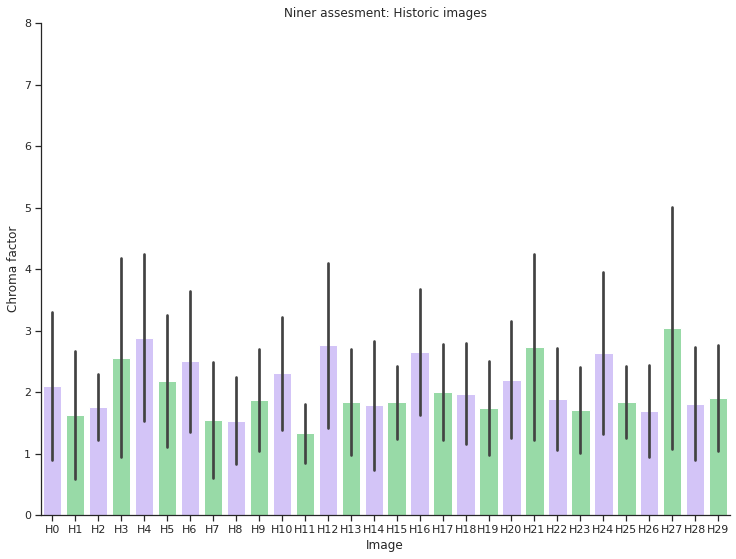

In [204]:
g = sns.catplot(
    x='test_image',
    y='choosen',
    data=df_historic,
    kind='bar',
    ci='sd',
    #color='#e34a33'
    palette=["m", "g"]
)

g.figure.set_size_inches(11.7, 8.27)
#g.figure.suptitle("Title")

g.set_axis_labels("Image", "Chroma factor")

g.set(ylim = (0,max_factor))
#g.despine(right = True)
g.set(title="Niner assesment: Historic images")


Boxplot

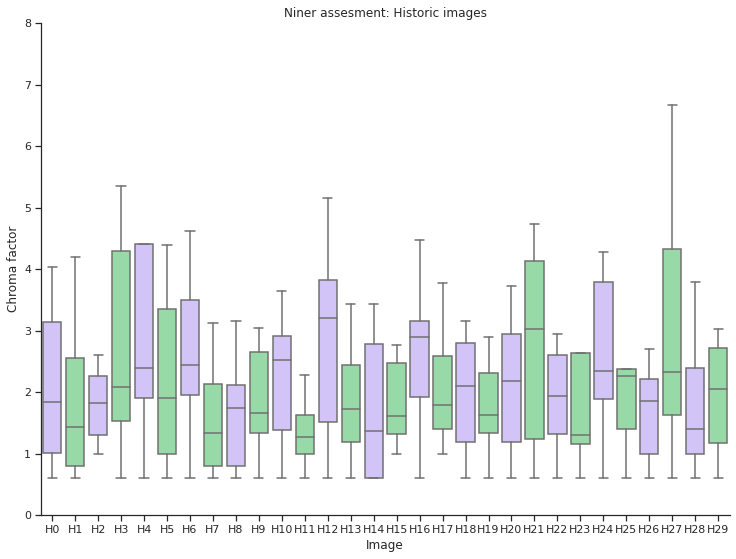

In [203]:
g = sns.catplot(
    x='test_image',
    y='choosen',
    data=df_historic,
    kind='box',
    ci='sd',
    #color='#e34a33')
    palette=["m", "g"]
)

g.fig.set_size_inches(11.7, 8.27)

g.set(ylim = (0,max_factor))

g.set_axis_labels("Image", "Chroma factor")
g.set(title="Niner assesment: Historic images")

sns.despine()

Get mean factor for each images over all observers

In [195]:
means = []
for img in df_historic["test_image"].unique():
    means.append((img, np.mean(df_historic[df_historic["test_image"] == img])["choosen"]))

df_historic_mean = pd.DataFrame(means)
df_historic_mean.columns = ["test_image", "mean"]
#df_historic_mean

In [196]:
np.mean(df_historic_mean["mean"])

2.076855072463768

<AxesSubplot:ylabel='mean'>

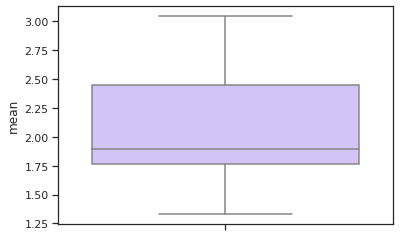

In [180]:
sns.boxplot(y="mean", palette=["m", "g"], data=df_historic_mean)
#sns.despine(offset=10, trim=True)

### Modern plots

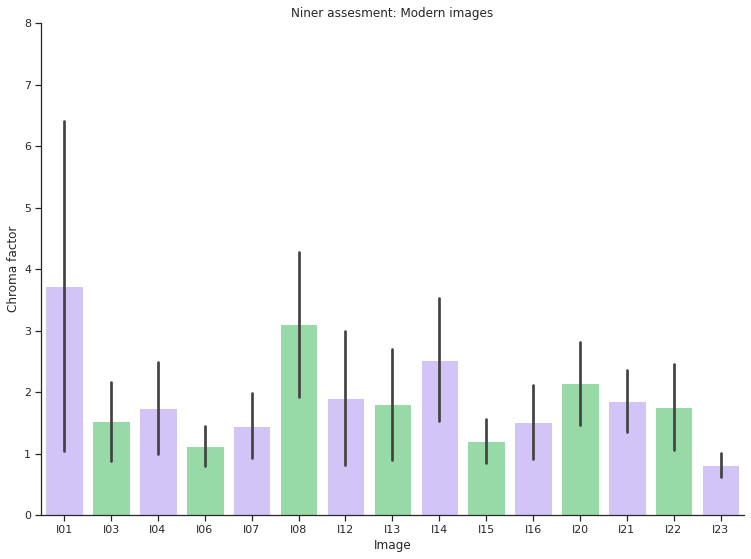

In [213]:
g = sns.catplot(x='test_image', y='choosen', data=df_modern,
                kind='bar', ci='sd', palette=["m", "g"])

g.fig.set_size_inches(11.7, 8.27)

g.set(ylim = (0,max_factor))

g.set_axis_labels("Image", "Chroma factor")
g.set(title="Niner assesment: Modern images")
sns.despine()


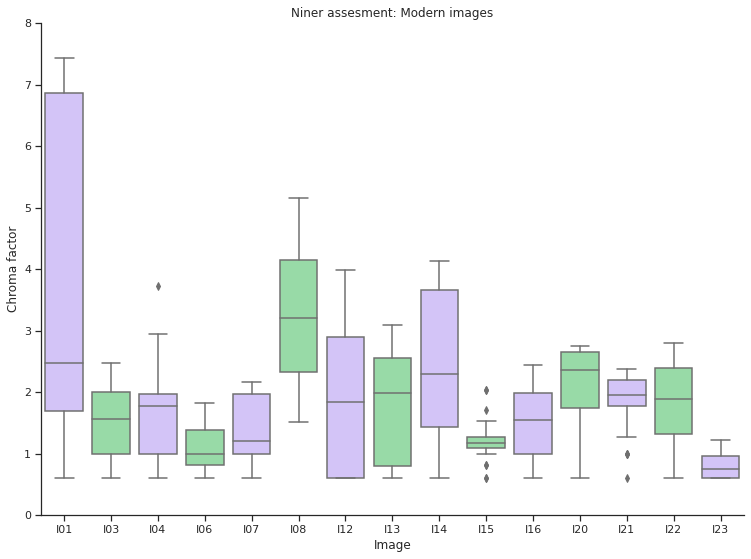

In [209]:
g = sns.catplot(x='test_image', y='choosen', data=df_modern,
                kind='box', ci='sd', 
                palette=["m", "g"])
                #color='#e34a33')

g.fig.set_size_inches(11.7, 8.27)

g.set(ylim = (0,max_factor))

g.set_axis_labels("Image", "Chroma factor")
g.set(title="Niner assesment: Modern images")
sns.despine()

# Plots for both image groups

In [183]:
means = []
for img in df_historic["test_image"].unique():
    means.append((img, "H", np.mean(df_historic[df_historic["test_image"] == img])["choosen"]))

for img in df_modern["test_image"].unique():
    means.append((img, "I", np.mean(df_modern[df_modern["test_image"] == img])["choosen"]))
    
df_mean = pd.DataFrame(means)
df_mean.columns = ["test_image", "type", "mean"]
df_mean

,test_image,type,mean
0,H0,H,2.105217
1,H1,H,1.631739
2,H2,H,1.760000
3,H3,H,2.563478
4,H4,H,2.883913
5,H5,H,2.187391
6,H6,H,2.500435
7,H7,H,1.543913
8,H8,H,1.539565
9,H9,H,1.874348


Boxplot overall modern and historic images.

Text(0, 0.5, 'Chroma factor mean')

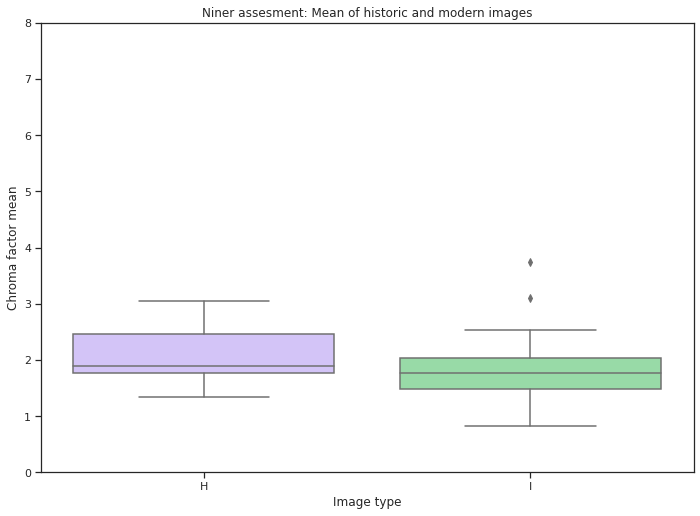

In [212]:
g = sns.boxplot(x="type", y="mean", palette=["m", "g"], data=df_mean)
g.set(title="Niner assesment: Mean of historic and modern images")
g.figure.set_size_inches(11.7, 8.27)

g.set(ylim = (0,max_factor))

#g.set_axis_labels("Image", "Chroma factor")

g.set_xlabel("Image type")
g.set_ylabel("Chroma factor mean")
#g.set_axis_labels("Image type", "Chroma factor")
#g.set_ylim((0,max_factor))
